<a href="https://www.kaggle.com/code/wangapa106g/introduction-to-ml-day1?scriptVersionId=261955807" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/day-1-dataset-students-performance/student_performance.csv


## This is day one code notebook to show how we can automate task by laveraging machine learning to approximate some functions 

In [2]:
# Day 1: Automating a Scoring Task with Linear Regression
# Dataset: Student Performance (synthetic, uploaded to Kaggle)

import pandas as pd #converting our data into dataframe ,think of it as a fancy dictionary
import numpy as np #we will be using tis library for linear algebra calculations e.g np.sum() for summing up
from sklearn.model_selection import train_test_split #for splitting our data for training and testing 
from sklearn.preprocessing import MinMaxScaler #for data normalisation
from sklearn.linear_model import LinearRegression #now this is our ml model that we want to train
from sklearn.metrics import mean_squared_error, r2_score # loss function
import matplotlib.pyplot as plt #helps us to visualize the data in 2D


In [3]:

# 1. Load the dataset

df = pd.read_csv("/kaggle/input/day-1-dataset-students-performance/student_performance.csv")

print("First 5 rows of raw data:")
print(df.head())


First 5 rows of raw data:
   Hours_Studied  Sleep_Hours  Attendance  Exam_Score
0              7            7          79       111.5
1              4            6          81        89.5
2              8            8          87       118.5
3              5            7          99       104.5
4              7            6          66       102.0


In [4]:
# =======================
# 2. Data Cleaning
# =======================
# Check for missing values
print("\nMissing values before cleaning:")
df.isna().sum()


Missing values before cleaning:


Hours_Studied    0
Sleep_Hours      0
Attendance       0
Exam_Score       0
dtype: int64

In [5]:
# Fill missing numeric values with median (if any)
#df.fillna(df.median(numeric_only=True), inplace=True)

In [6]:
# =======================
# 3. Handle Outliers
# =======================
# Clip unrealistic values
df["Sleep_Hours"] = df["Sleep_Hours"].clip(3, 12)
df["Exam_Score"] = df["Exam_Score"].clip(0, 100)


In [7]:
# =======================
# 4. Feature Scaling
# =======================
scaler = MinMaxScaler()
X = df[["Hours_Studied", "Sleep_Hours", "Attendance"]]
y = df["Exam_Score"]

X_scaled = scaler.fit_transform(X)

X_scaled.dtype
X_scaled

array([[0.75      , 0.75      , 0.48717949],
       [0.375     , 0.5       , 0.53846154],
       [0.875     , 1.        , 0.69230769],
       ...,
       [0.375     , 0.75      , 0.35897436],
       [0.375     , 0.        , 0.38461538],
       [0.625     , 0.        , 0.66666667]])

In [8]:
# =======================
# 5. Train/Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

X_train

array([[0.875     , 0.25      , 0.35897436],
       [0.25      , 0.75      , 0.28205128],
       [0.5       , 0.5       , 0.43589744],
       ...,
       [0.25      , 0.        , 0.25641026],
       [0.125     , 0.75      , 0.41025641],
       [0.25      , 0.        , 0.41025641]])

In [9]:
# =======================
# 6. Train Linear Regression Model
# =======================
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:


# =======================
# 7. Predictions & Evaluation
# =======================
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# =======================



Model Evaluation:
Mean Squared Error (MSE): 28.80
R² Score: 0.85


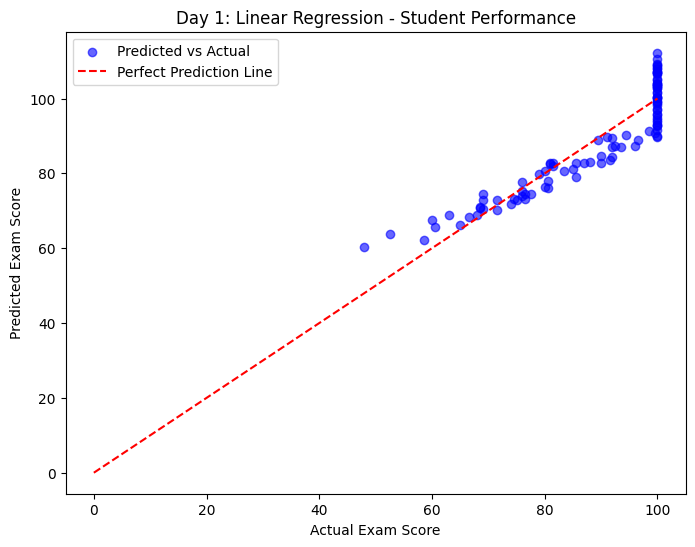

In [11]:
# 8. Visualization
# =======================
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([0,100], [0,100], 'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Day 1: Linear Regression - Student Performance")
plt.legend()
plt.show()



In [12]:
# =======================
# 9. Model Coefficients
# =======================
print("\nModel Coefficients:")
for feature, coef in zip(["Hours_Studied", "Sleep_Hours", "Attendance"], model.coef_):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {model.intercept_:.2f}")


Model Coefficients:
Hours_Studied: 38.54
Sleep_Hours: 7.16
Attendance: 12.47
Intercept: 58.42


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


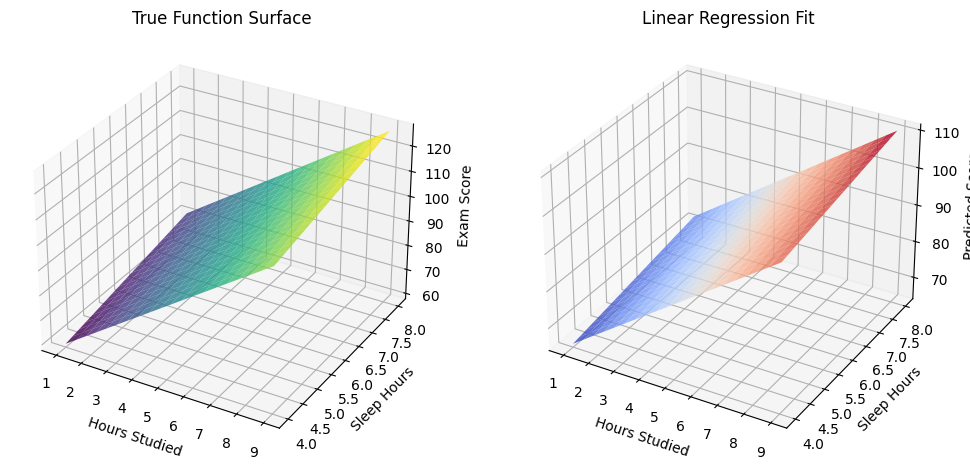

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# =======================
# 10. Visualize True Function vs Regression
# =======================

# Pick two variables for visualization: Hours_Studied & Sleep_Hours
# Fix Attendance at its mean
attendance_mean = df["Attendance"].mean()

# Create a grid for plotting
hours_range = np.linspace(df["Hours_Studied"].min(), df["Hours_Studied"].max(), 20)
sleep_range = np.linspace(df["Sleep_Hours"].min(), df["Sleep_Hours"].max(), 20)
H, S = np.meshgrid(hours_range, sleep_range)

# True function (without noise)
true_scores = (H * 7) + (S * 3) + (attendance_mean * 0.5)

# Predicted function (learned model)
# Need to scale inputs like training
grid = np.c_[H.ravel(), S.ravel(), np.full(H.ravel().shape, attendance_mean)]
grid_scaled = scaler.transform(grid)
pred_scores = model.predict(grid_scaled).reshape(H.shape)

# Plot 3D comparison
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(H, S, true_scores, cmap=cm.viridis, alpha=0.8)
ax.set_title("True Function Surface")
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Sleep Hours")
ax.set_zlabel("Exam Score")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(H, S, pred_scores, cmap=cm.coolwarm, alpha=0.8)
ax.set_title("Linear Regression Fit")
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Sleep Hours")
ax.set_zlabel("Predicted Score")

plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


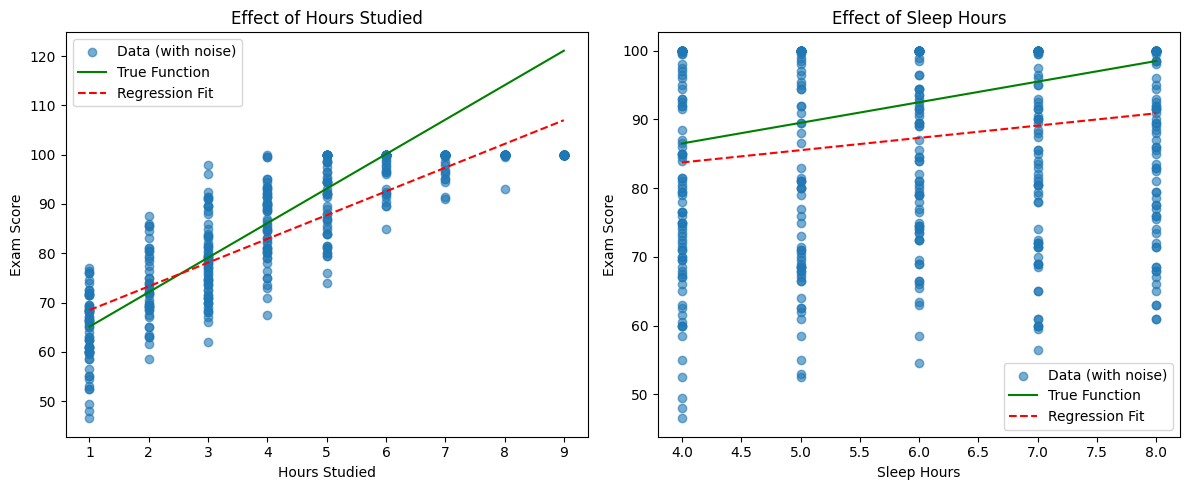

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Fix Attendance at mean
attendance_mean = df["Attendance"].mean()

# 1. Hours Studied vs Exam Score
hours_range = np.linspace(df["Hours_Studied"].min(), df["Hours_Studied"].max(), 50)
sleep_mean = df["Sleep_Hours"].mean()

# True function (without noise)
true_scores_hours = (hours_range * 7) + (sleep_mean * 3) + (attendance_mean * 0.5)

# Predicted scores from model
grid_hours = np.c_[hours_range, np.full(hours_range.shape, sleep_mean), np.full(hours_range.shape, attendance_mean)]
grid_hours_scaled = scaler.transform(grid_hours)
pred_scores_hours = model.predict(grid_hours_scaled)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(df["Hours_Studied"], df["Exam_Score"], alpha=0.6, label="Data (with noise)")
plt.plot(hours_range, true_scores_hours, color="green", label="True Function")
plt.plot(hours_range, pred_scores_hours, color="red", linestyle="--", label="Regression Fit")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Effect of Hours Studied")
plt.legend()

# 2. Sleep Hours vs Exam Score
sleep_range = np.linspace(df["Sleep_Hours"].min(), df["Sleep_Hours"].max(), 50)
hours_mean = df["Hours_Studied"].mean()

true_scores_sleep = (hours_mean * 7) + (sleep_range * 3) + (attendance_mean * 0.5)

grid_sleep = np.c_[np.full(sleep_range.shape, hours_mean), sleep_range, np.full(sleep_range.shape, attendance_mean)]
grid_sleep_scaled = scaler.transform(grid_sleep)
pred_scores_sleep = model.predict(grid_sleep_scaled)

plt.subplot(1,2,2)
plt.scatter(df["Sleep_Hours"], df["Exam_Score"], alpha=0.6, label="Data (with noise)")
plt.plot(sleep_range, true_scores_sleep, color="green", label="True Function")
plt.plot(sleep_range, pred_scores_sleep, color="red", linestyle="--", label="Regression Fit")
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.title("Effect of Sleep Hours")
plt.legend()

plt.tight_layout()
plt.show()
